In [14]:
import pandas as pd

In [15]:
competitive_mapping = {
'Extremely uncompetitive': 1,
'Uncompetitive': 2,
'Somewhat uncompetitive': 3, 
'Neutral (neither competitive nor uncompetitive)':4,
'Somewhat competitive': 5,
'Competitive': 6,
'Extremely competitive': 7
}

In [16]:
df = pd.read_csv('Responses/pilot3_responses.csv')  

groups = df['label'].unique()

intervention_map = {}
language_map = {}
for group in groups:
    language = group.split('-')[0]
    intervention = group.split('-')[1]
    language_map[group] = language
    intervention_map[group] = intervention

df['Language'] = df['label'].apply(lambda x: language_map[x])
df['Intervention'] = df['label'].apply(lambda x: intervention_map[x])
df['Competitiveness_score'] = df['Competitiveness rating'].apply(lambda x: competitive_mapping[x])

Text(0, 0.5, 'Competitive Score')

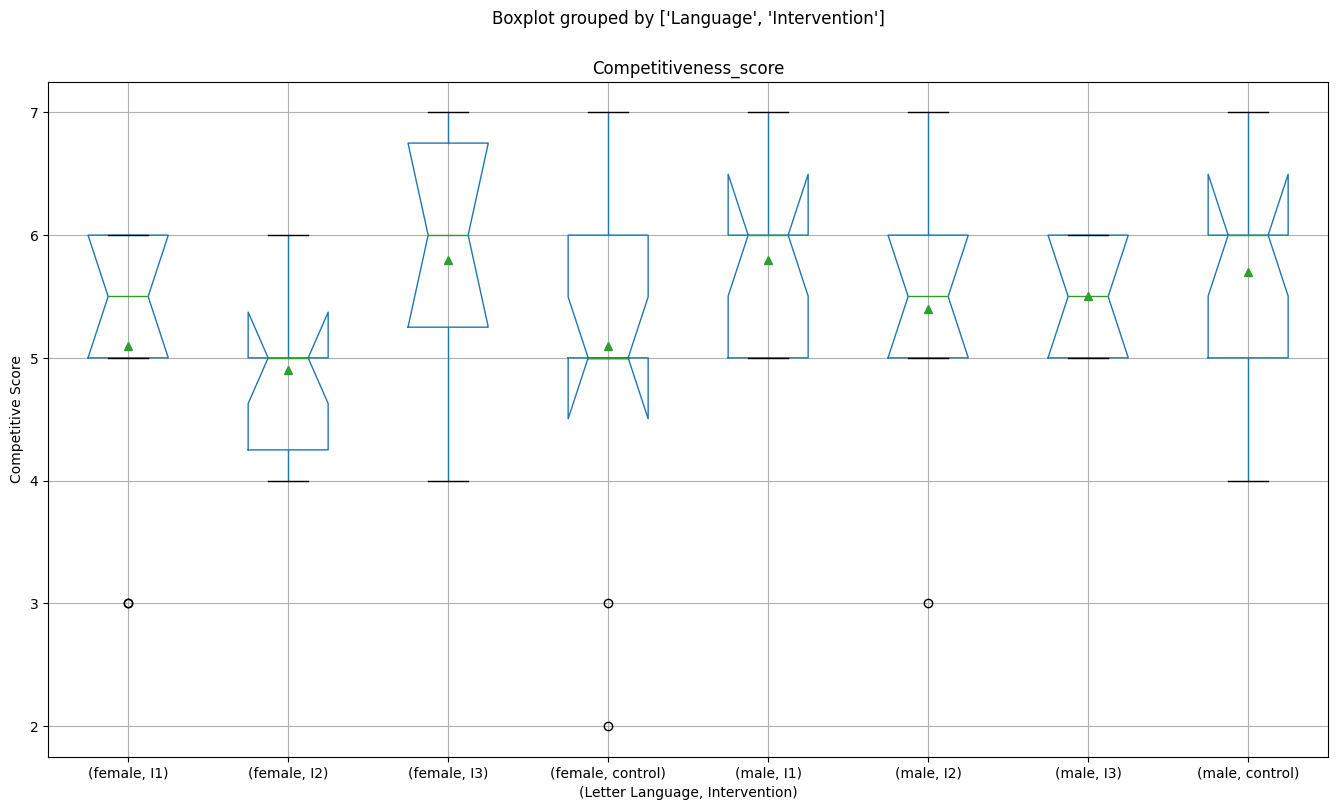

In [17]:
boxplot = df.boxplot(["Competitiveness_score"], by = ["Language", "Intervention"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("(Letter Language, Intervention)")
boxplot.set_ylabel("Competitive Score")

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, gls

model = ols('Competitiveness_score ~ C(Intervention) + C(Language)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
eta_squared = anova_table['sum_sq'][1] / (anova_table['sum_sq'][1] + anova_table['sum_sq'][2])

In [19]:
eta_squared


0.03314672952268687